## Handling Class Imbalance

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

sns.set(style='whitegrid')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/l

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [7]:
# load Processed and scaled Parquet files
from pathlib import Path

DATA_DIR = Path('../data/interim/')

X_train_scaled = pd.read_parquet(DATA_DIR / 'X_train.parquet')
X_val_scaled   = pd.read_parquet(DATA_DIR / 'X_val.parquet')
X_test_scaled  = pd.read_parquet(DATA_DIR / 'X_test.parquet')

y_train = pd.read_parquet(DATA_DIR / 'y_train.parquet')
y_val   = pd.read_parquet(DATA_DIR / 'y_val.parquet')
y_test  = pd.read_parquet(DATA_DIR / 'y_test.parquet')

print("Train shape:", X_train_scaled.shape)
print("Valid shape:", X_val_scaled.shape)
print("Test shape:", X_test_scaled.shape)
print("Class distribution (train):\n", y_train.value_counts())


ArrowKeyError: A type extension with name pandas.period already defined

In [3]:
# convert y_train to a 1D series 

# If y_train is a DataFrame with a single column
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()  # Converts (n,1) DataFrame -> Series

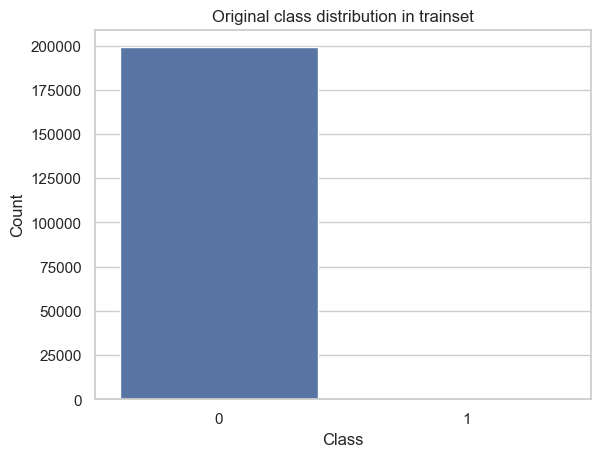

Class balance ratio (majority/minority): 578.546511627907


In [ ]:
# visualise the original imbalance 

sns.countplot(x=y_train)
plt.title("Original class distribution in trainset")
plt.xlabel("Class")
plt.ylabel("Count")
save_path = "../reports/figures/06_original_class_distribution_in_trainset.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print("Class balance ratio (majority/minority):",
      y_train.value_counts()[0] / y_train.value_counts()[1])

In [5]:
# SMOTE (Oversampling)

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE class distribution:\n", pd.Series(y_train_smote).value_counts())

After SMOTE class distribution:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [6]:
# Random Undersampling 

rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

print("After Random UnderSampling:\n", pd.Series(y_train_rus).value_counts())

After Random UnderSampling:
 Class
0    344
1    344
Name: count, dtype: int64


In [7]:
# combined (SMOTETomek)

smt = SMOTETomek(random_state=42)

X_train_smt, y_train_smt = smt.fit_resample(X_train_scaled, y_train)

print("After SMOTE + Tomek:\n", pd.Series(y_train_smt).value_counts())

After SMOTE + Tomek:
 Class
0    199020
1    199020
Name: count, dtype: int64


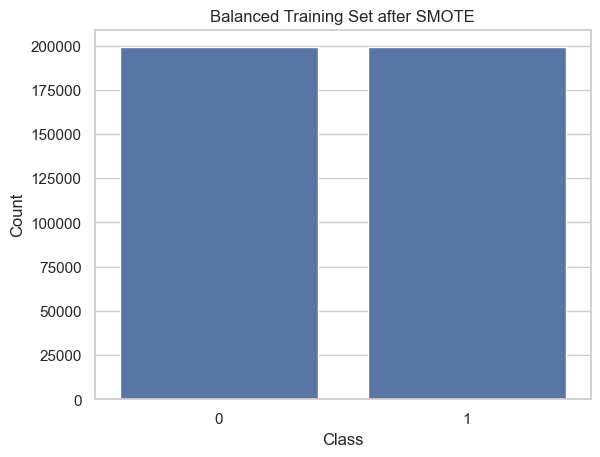

In [ ]:
# visualise resampled distribution (SMOTE)

sns.countplot(x=y_train_smote)
plt.title("Balanced Training Set after SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
save_path = "../reports/figures/07_balanced_training_set_after_SMOTE.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# save the balanced dataset 

X_train_smote.to_parquet(DATA_DIR / 'X_train_balanced_smote.parquet', index=False)
y_train_smote.to_frame().to_parquet(DATA_DIR / 'y_train_balanced_smote.parquet', index=False)


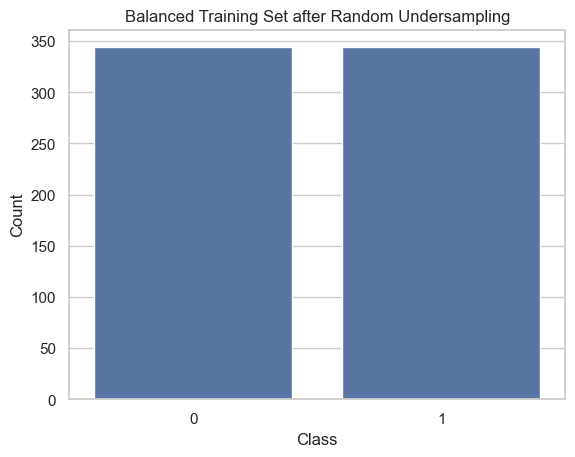

In [ ]:
# visualise resampled distribution (Random Undersmapling)

sns.countplot(x=y_train_rus)
plt.title("Balanced Training Set after Random Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
save_path = "../reports/figures/08_balanced_training_set_after_random_undersampling.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# save the balanced dataset 

X_train_rus.to_parquet(DATA_DIR / 'X_train_balanced_rus.parquet', index=False)
y_train_rus.to_frame().to_parquet(DATA_DIR / 'y_train_balanced_rus.parquet', index=False)


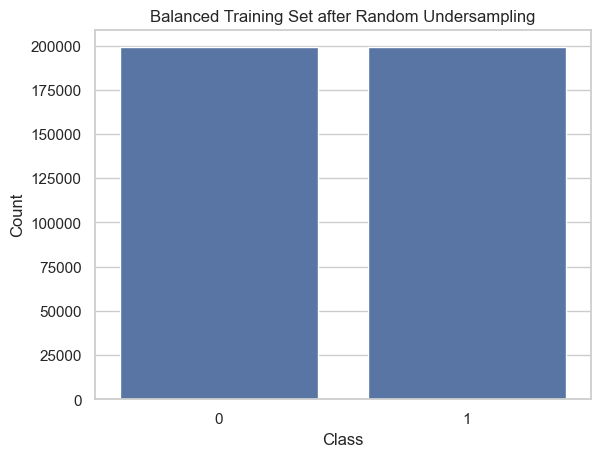

In [ ]:
# visualise resampled distribution (Combined SMOTETomek)

sns.countplot(x=y_train_smt)
plt.title("Balanced Training Set after combined SMOTETomek")
plt.xlabel("Class")
plt.ylabel("Count")
save_path = "../reports/figures/09_balanced_training_set_after_combined_SMOTETomek.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# save the balanced dataset 

X_train_smt.to_parquet(DATA_DIR / 'X_train_balanced_smt.parquet', index=False)
y_train_smt.to_frame().to_parquet(DATA_DIR / 'y_train_balanced_smt.parquet', index=False)
